# Test Notebook

## Forward Pass

### Example Dataset

In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

### Simple Dense Model

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


### Weights and biases

Parameters after one iteration.

**Dense 1 (6 neurons, 4 inputs)**

In [3]:
dense1.info()

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[-0.1093212  -0.01052544  0.09103704  0.11434726]
 [ 0.11170012 -0.08992451  0.06843326 -0.06675159]
 [-0.13125935 -0.03477549 -0.04944095 -0.09370033]
 [ 0.1771584  -0.14039332  0.06789722  0.0831771 ]
 [-0.16509689 -0.00055295  0.06212483  0.08690072]
 [-0.18738328 -0.07983817  0.04304449 -0.10378145]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[ 1.23409185 -0.30497131 -1.45735296  1.02121686  0.760878   -1.3330917 ]
 [ 1.18079758 -0.40662445 -1.33754039  0.78690384  0.7686372  -1.24895066]
 [ 0.24354676 -0.18909632 -0.85671715  0.42232166 -0.00467338 -1.08005402]]



**Activation 1 (ReLU)**

In [4]:
activation1.info()

Inputs:
[[ 1.23409185 -0.30497131 -1.45735296  1.02121686  0.760878   -1.3330917 ]
 [ 1.18079758 -0.40662445 -1.33754039  0.78690384  0.7686372  -1.24895066]
 [ 0.24354676 -0.18909632 -0.85671715  0.42232166 -0.00467338 -1.08005402]]

Outputs:
[[1.23409185 0.         0.         1.02121686 0.760878   0.        ]
 [1.18079758 0.         0.         0.78690384 0.7686372  0.        ]
 [0.24354676 0.         0.         0.42232166 0.         0.        ]]



**Dense 2 (3 neurons, 6 inputs)**

In [5]:
dense2.info()

Inputs:
[[1.23409185 0.         0.         1.02121686 0.760878   0.        ]
 [1.18079758 0.         0.         0.78690384 0.7686372  0.        ]
 [0.24354676 0.         0.         0.42232166 0.         0.        ]]

Weights:
[[ 0.16865887 -0.09890124 -0.02046217 -0.09549543  0.01848868 -0.0233542 ]
 [-0.07200502  0.09170328  0.17243901 -0.02448305 -0.02802372  0.13223072]
 [ 0.18289628  0.08533753 -0.02383854 -0.17355777  0.08803061  0.03247667]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.12468664 -0.13518594  0.11545124]
 [ 0.13821736 -0.12582923  0.14705381]
 [ 0.00074654 -0.02787631 -0.02875341]]



**Activation 2 (Softmax)**

In [6]:
activation2.info()

Inputs:
[[ 0.12468664 -0.13518594  0.11545124]
 [ 0.13821736 -0.12582923  0.14705381]
 [ 0.00074654 -0.02787631 -0.02875341]]

Outputs:
[[0.36206212 0.27920415 0.35873373]
 [0.36012503 0.27655361 0.36332136]
 [0.33982237 0.33023357 0.32994405]]



### Loss

* loss1: CategoricalCrossentropy
* loss2: SparseCategoricalCrossentropy

In [7]:
loss1, loss2

(1.0514779805632493, 1.0514779805632493)

## Visualize datasets

### Spiral Data

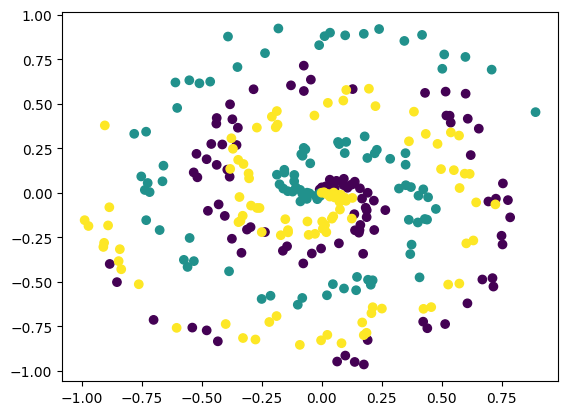

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Vertical Data

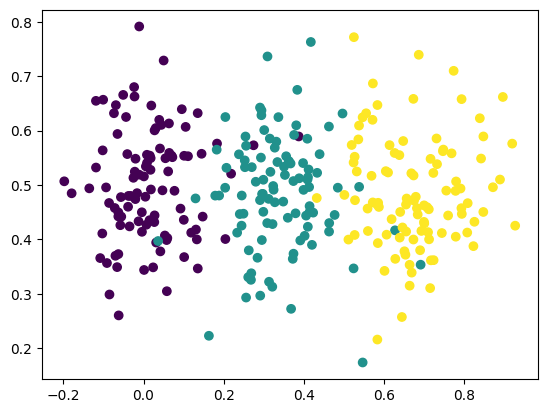

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Backward Pass

### Simple Dense Model
One forward and one backward.

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.099338213056398
acc: 0.2966666666666667


### Gradients

Calculated gradients after one iteration.

**Dense 1 Weight Gradient**

In [11]:
dense1.dweights

array([[ 0.00119134, -0.00101437],
       [ 0.00152705, -0.00212519],
       [ 0.00079484, -0.00269519],
       [-0.00094144, -0.0020349 ]])

**Dense 1 Bias Gradient**

In [12]:
dense1.dbiases

array([0.00264258, 0.00570467, 0.00748894, 0.00781711])

**Dense 2 Weight Gradient**

In [13]:
dense2.dweights

array([[-0.00086864, -0.00225817, -0.00039028, -0.00207456],
       [-0.00033891,  0.00086661,  0.00063583,  0.00325467],
       [ 0.00120755,  0.00139156, -0.00024555, -0.0011801 ]])

**Dense 2 Bias Gradient**

In [14]:
dense2.dbiases

array([-0.00056008,  0.00199929, -0.00143921])

## Optimizing Parameters 

### SGD 

* Learning rate: 1.0
* Decay: 0.0
* Momentum: 0.0
* Epoch: 10000

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.367, loss: 1.100, lr: 1.0
epoch: 1000, acc: 0.503, loss: 1.018, lr: 1.0
epoch: 2000, acc: 0.507, loss: 0.966, lr: 1.0
epoch: 3000, acc: 0.580, loss: 0.880, lr: 1.0
epoch: 4000, acc: 0.627, loss: 0.792, lr: 1.0
epoch: 5000, acc: 0.693, loss: 0.676, lr: 1.0
epoch: 6000, acc: 0.703, loss: 0.670, lr: 1.0
epoch: 7000, acc: 0.720, loss: 0.653, lr: 1.0
epoch: 8000, acc: 0.737, loss: 0.629, lr: 1.0
epoch: 9000, acc: 0.743, loss: 0.628, lr: 1.0
epoch: 10000, acc: 0.580, loss: 1.038, lr: 1.0


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* Momentum: 0.0
* Epoch: 10000

In [16]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.380, loss: 1.097, lr: 1.0
epoch: 1000, acc: 0.480, loss: 1.013, lr: 0.5002501250625312
epoch: 2000, acc: 0.533, loss: 0.969, lr: 0.33344448149383127
epoch: 3000, acc: 0.583, loss: 0.911, lr: 0.25006251562890724
epoch: 4000, acc: 0.610, loss: 0.859, lr: 0.2000400080016003
epoch: 5000, acc: 0.643, loss: 0.814, lr: 0.16669444907484582
epoch: 6000, acc: 0.683, loss: 0.778, lr: 0.1428775539362766
epoch: 7000, acc: 0.680, loss: 0.743, lr: 0.12501562695336915
epoch: 8000, acc: 0.703, loss: 0.712, lr: 0.11112345816201799
epoch: 9000, acc: 0.713, loss: 0.685, lr: 0.1000100010001
epoch: 10000, acc: 0.727, loss: 0.664, lr: 0.09091735612328393


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* **Momentum: 0.9**
* Epoch: 10000

In [17]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.270, loss: 1.104, lr: 1
epoch: 1000, acc: 0.927, loss: 0.220, lr: 0.5002501250625312
epoch: 2000, acc: 0.930, loss: 0.164, lr: 0.33344448149383127
epoch: 3000, acc: 0.937, loss: 0.142, lr: 0.25006251562890724
epoch: 4000, acc: 0.937, loss: 0.131, lr: 0.2000400080016003
epoch: 5000, acc: 0.940, loss: 0.124, lr: 0.16669444907484582
epoch: 6000, acc: 0.940, loss: 0.120, lr: 0.1428775539362766
epoch: 7000, acc: 0.943, loss: 0.117, lr: 0.12501562695336915
epoch: 8000, acc: 0.943, loss: 0.114, lr: 0.11112345816201799
epoch: 9000, acc: 0.947, loss: 0.112, lr: 0.1000100010001
epoch: 10000, acc: 0.947, loss: 0.111, lr: 0.09091735612328393


### AdaGrad 

* Learning rate: 1.0
* Decay: 0.0
* Epsilon: 1e-7
* Epoch: 10000

In [18]:
from src.optimizers import AdaGrad

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = AdaGrad()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.363, loss: 1.099, lr: 1.0
epoch: 1000, acc: 0.533, loss: 0.847, lr: 1.0
epoch: 2000, acc: 0.630, loss: 0.769, lr: 1.0
epoch: 3000, acc: 0.663, loss: 0.717, lr: 1.0
epoch: 4000, acc: 0.630, loss: 0.685, lr: 1.0
epoch: 5000, acc: 0.643, loss: 0.653, lr: 1.0
epoch: 6000, acc: 0.683, loss: 0.635, lr: 1.0
epoch: 7000, acc: 0.680, loss: 0.621, lr: 1.0
epoch: 8000, acc: 0.707, loss: 0.615, lr: 1.0
epoch: 9000, acc: 0.700, loss: 0.603, lr: 1.0
epoch: 10000, acc: 0.697, loss: 0.589, lr: 1.0


### RMSProp 

* Learning rate: 0.001
* **Decay: 1e-4**
* Epsilon: 1e-7
* Rho: 0.9
* Epoch: 10000

In [19]:
from src.optimizers import RMSProp

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = RMSProp(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.323, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.617, loss: 0.931, lr: 0.0009091735612328393
epoch: 2000, acc: 0.690, loss: 0.792, lr: 0.0008334027835652972
epoch: 3000, acc: 0.717, loss: 0.695, lr: 0.0007692899453804139
epoch: 4000, acc: 0.750, loss: 0.625, lr: 0.0007143367383384526
epoch: 5000, acc: 0.770, loss: 0.568, lr: 0.0006667111140742716
epoch: 6000, acc: 0.800, loss: 0.514, lr: 0.0006250390649415589
epoch: 7000, acc: 0.820, loss: 0.471, lr: 0.0005882698982293077
epoch: 8000, acc: 0.843, loss: 0.438, lr: 0.0005555864214678594
epoch: 9000, acc: 0.873, loss: 0.409, lr: 0.0005263434917627244
epoch: 10000, acc: 0.880, loss: 0.383, lr: 0.0005000250012500625


### Adam 

* Learning rate: 0.001
* Decay: 0.0
* Epsilon: 1e-7
* Beta 1: 0.9
* Beta 2: 0.999
* Epoch: 10000

In [20]:
from src.optimizers import Adam

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.333, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.640, loss: 0.889, lr: 0.001
epoch: 2000, acc: 0.783, loss: 0.610, lr: 0.001
epoch: 3000, acc: 0.853, loss: 0.449, lr: 0.001
epoch: 4000, acc: 0.910, loss: 0.335, lr: 0.001
epoch: 5000, acc: 0.927, loss: 0.254, lr: 0.001
epoch: 6000, acc: 0.927, loss: 0.204, lr: 0.001
epoch: 7000, acc: 0.940, loss: 0.172, lr: 0.001
epoch: 8000, acc: 0.947, loss: 0.150, lr: 0.001
epoch: 9000, acc: 0.947, loss: 0.133, lr: 0.001
epoch: 10000, acc: 0.950, loss: 0.122, lr: 0.001


### Testing

Performance of the last model.

In [21]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.843, loss: 0.556


## Regularization

In [22]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam(learning_rate=0.02, decay=5e-7)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss:{data_loss:.3f}, reg loss:{regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.357, loss: 1.098, (data loss:1.098, reg loss:0.001), lr: 0.02
epoch: 1000, acc: 0.913, loss: 0.383, (data loss:0.233, reg loss:0.150), lr: 0.019990014987513734
epoch: 2000, acc: 0.923, loss: 0.313, (data loss:0.186, reg loss:0.127), lr: 0.019980029960054924
epoch: 3000, acc: 0.940, loss: 0.276, (data loss:0.164, reg loss:0.112), lr: 0.01997005490267344
epoch: 4000, acc: 0.940, loss: 0.254, (data loss:0.151, reg loss:0.103), lr: 0.019960089800444013
epoch: 5000, acc: 0.953, loss: 0.233, (data loss:0.137, reg loss:0.095), lr: 0.01995013463847114
epoch: 6000, acc: 0.957, loss: 0.223, (data loss:0.127, reg loss:0.096), lr: 0.019940189401889033
epoch: 7000, acc: 0.943, loss: 0.217, (data loss:0.127, reg loss:0.090), lr: 0.019930254075861523
epoch: 8000, acc: 0.947, loss: 0.208, (data loss:0.121, reg loss:0.087), lr: 0.019920328645581995
epoch: 9000, acc: 0.960, loss: 0.203, (data loss:0.120, reg loss:0.083), lr: 0.019910413096273318
epoch: 10000, acc: 0.960, loss: 0.194, (d

### Testing

Performance of the last model.

In [23]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.853, loss: 0.512
